### Visualising multidimensional data

In [1]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

You should by now be quite happy about working with and plotting one or two factors against annother.  However, in biology is it common to be dealing with datasets with many parameters.  For example, the expression level of thousands of genes across many tissues, or the frequency of hundreds of species in hundreds of sites, or tens of measurements across hundreds of beaks.  Multivariant Analysis is a way of managing and visualising such large datasets.  We will cover correlations across large datasets, heatplots to visualisae them, heirarthical clustering and PCA

Here is a basic dataset of expression patterns for a set of biosynthietic genes from a range of plant tissues.

In [2]:
df = pd.read_csv('TPS.csv')
df.head(3)

,Gene,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,Bcon1055-5.2_TPS-bc3,Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase,...,Bcon983-0.7_TPS-bc2,Bcon983-1.18_TPS-bc2,Bcon983-1.31_TPS-bc2,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase
0,Female.flower.B.conchifolia.rep1,67.311275,0.0,15.645225,0.660818,0,0.0,0,0.0,0,...,0,22.447206,0,0,0.188740,1.391640,3.125789,0.0,0.940281,0
1,Female.flower.B.conchifolia.rep2,24.881496,0.0,3.396060,0.000000,0,0.0,0,0.0,0,...,0,13.809320,0,0,0.000000,0.964168,1.100803,0.0,0.000000,0
2,Female.flower.B.conchifolia.rep3,0.000000,0.0,4.865841,0.101612,0,0.0,0,0.0,0,...,0,3.518609,0,0,0.437499,0.910456,0.333213,0.0,0.000000,0


We will make the sample data rows more useful by splitting into groups

In [3]:
new = df["Gene"].str.split(".B.|.rep", n = 2, expand = True)
new.head(3)

,0,1,2
0,Female.flower,conchifolia,1
1,Female.flower,conchifolia,2
2,Female.flower,conchifolia,3


In [4]:
# Dropping old Name columns
df.drop(columns =["Gene"], inplace = True)
df.insert(0,'Tissue', new[0] )
df.insert(0,'Species', new[1] )
df.insert(0,'Rep', new[2] )
df.head(3)

,Rep,Species,Tissue,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,...,Bcon983-0.7_TPS-bc2,Bcon983-1.18_TPS-bc2,Bcon983-1.31_TPS-bc2,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase
0,1,conchifolia,Female.flower,67.311275,0.0,15.645225,0.660818,0,0.0,0,...,0,22.447206,0,0,0.188740,1.391640,3.125789,0.0,0.940281,0
1,2,conchifolia,Female.flower,24.881496,0.0,3.396060,0.000000,0,0.0,0,...,0,13.809320,0,0,0.000000,0.964168,1.100803,0.0,0.000000,0
2,3,conchifolia,Female.flower,0.000000,0.0,4.865841,0.101612,0,0.0,0,...,0,3.518609,0,0,0.437499,0.910456,0.333213,0.0,0.000000,0


In [5]:
#Splitting dependant and independat variables
X = df.loc[:, "Bcon1019-0.0_TPS-bc3":]  # independent variables data
Y = df.loc[:, "Rep":"Tissue"]  # dependednt variable data

In [4]:
df.head()

,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,Bcon1055-5.2_TPS-bc3,Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase,Bcon109-3.8_3-hydroxy-3-methylglutaryl coenzyme A reductase,...,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase,Tissue,species,Rep
0,67.311275,0.0,15.645225,0.660818,0,0.0,0,0.0,0,140.151858,...,0,0.188740,1.391640,3.125789,0.000000,0.940281,0,Female.flower,conchifolia,1
1,24.881496,0.0,3.396060,0.000000,0,0.0,0,0.0,0,168.266137,...,0,0.000000,0.964168,1.100803,0.000000,0.000000,0,Female.flower,conchifolia,2
2,0.000000,0.0,4.865841,0.101612,0,0.0,0,0.0,0,178.561685,...,0,0.437499,0.910456,0.333213,0.000000,0.000000,0,Female.flower,conchifolia,3
3,0.000000,0.0,9.810125,0.140581,0,0.0,0,0.0,0,35.867421,...,0,0.296516,1.205079,0.819789,0.000000,0.884948,0,Leaf,conchifolia,1
4,0.000000,0.0,8.091472,1.800174,0,0.0,0,0.0,0,40.712185,...,0,0.000000,0.800220,2.437815,0.700965,2.614249,0,Leaf,conchifolia,2


In [5]:
df.describe()

,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,Bcon1055-5.2_TPS-bc3,Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase,Bcon109-3.8_3-hydroxy-3-methylglutaryl coenzyme A reductase,...,Bcon983-0.7_TPS-bc2,Bcon983-1.18_TPS-bc2,Bcon983-1.31_TPS-bc2,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase
count,36.000000,36.000000,36.000000,36.000000,36.0,36.000000,36.0,36.000000,36.0,36.000000,...,36.0,36.000000,36.0,36.0,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,49.655797,2.994775,8.844578,0.537160,0.0,1.194785,0.0,1.712132,0.0,168.296520,...,0.0,6.640752,0.0,0.0,1.282518,1.690958,7.241468,0.202839,6.348424,0.0
std,146.008415,4.959268,3.508785,0.979806,0.0,2.582390,0.0,2.601749,0.0,103.882396,...,0.0,17.353320,0.0,0.0,3.359908,2.262099,18.535442,0.777848,19.487094,0.0
min,0.000000,0.000000,2.785489,0.000000,0.0,0.000000,0.0,0.000000,0.0,16.280952,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,5.470198,0.000000,0.0,0.000000,0.0,0.000000,0.0,118.316571,...,0.0,0.201176,0.0,0.0,0.000000,0.407832,0.452119,0.000000,0.000000,0.0
50%,0.000000,0.360312,8.899535,0.079268,0.0,0.000000,0.0,0.202499,0.0,147.455481,...,0.0,0.421347,0.0,0.0,0.275829,0.896740,0.830992,0.000000,0.497733,0.0
75%,1.646738,4.602375,11.469944,0.621480,0.0,0.392406,0.0,2.430931,0.0,191.264679,...,0.0,1.172816,0.0,0.0,0.758830,1.790371,3.299946,0.000000,2.348776,0.0
max,775.748743,20.639070,15.645225,3.767931,0.0,8.317929,0.0,8.911507,0.0,552.243608,...,0.0,69.053289,0.0,0.0,19.109890,9.247095,94.998578,4.620112,106.685782,0.0


We could try to pairplot everything against everything, but with nearly 100 genes it would be a strain.

In [ ]:
# Do not run!
# sns.pairplot(df, hue="Tissue")

KeyboardInterrupt: 

We could plot expression of individual genes.  Which would be interesting

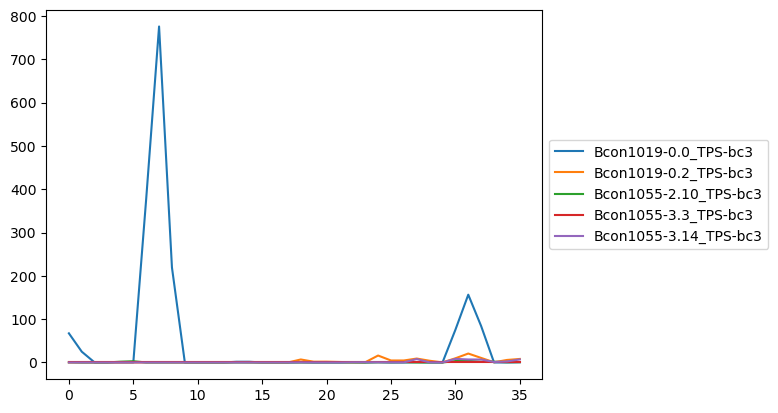

In [35]:
ax = df[["Bcon1019-0.0_TPS-bc3","Bcon1019-0.2_TPS-bc3","Bcon1055-2.10_TPS-bc3","Bcon1055-3.3_TPS-bc3","Bcon1055-3.14_TPS-bc3"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [45]:
X.apply(np.mean)

Bcon1019-0.0_TPS-bc3                                                 49.655797
Bcon1019-0.2_TPS-bc3                                                  2.994775
Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein     8.844578
Bcon1055-2.10_TPS-bc3                                                 0.537160
Bcon1055-3.1_TPS-bc3                                                  0.000000
                                                                       ...    
Bcon983-1.7_TPS-bc2                                                   1.690958
Bcon995-0.5_TPS-bc3                                                   7.241468
Bcon995-0.6_TPS-bc3                                                   0.202839
Bcon995-0.7_TPS-bc3                                                   6.348424
Bcon1049-2.11_Geranyl diphosphate synthase                            0.000000
Length: 102, dtype: float64

We could look at covariencer between groups using the methods from last week, and analysis whether there was more varation between speices or tissues

However, we can also look at correaltaions across the whole matrix

In [6]:
corrmat = X.corr()
corrmat

,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,Bcon1055-5.2_TPS-bc3,Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase,Bcon109-3.8_3-hydroxy-3-methylglutaryl coenzyme A reductase,...,Bcon983-0.7_TPS-bc2,Bcon983-1.18_TPS-bc2,Bcon983-1.31_TPS-bc2,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase
Bcon1019-0.0_TPS-bc3,1.000000,-0.007390,0.238361,0.020721,NaN,0.012373,NaN,-0.082005,NaN,-0.118767,...,NaN,0.843876,NaN,NaN,-0.105836,-0.120104,0.007962,-0.060767,0.030317,NaN
Bcon1019-0.2_TPS-bc3,-0.007390,1.000000,0.304442,0.523585,NaN,0.716988,NaN,0.870053,NaN,0.101446,...,NaN,-0.188076,NaN,NaN,0.184807,-0.003356,0.304547,0.079291,0.365028,NaN
Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,0.238361,0.304442,1.000000,0.167268,NaN,0.165037,NaN,0.248240,NaN,-0.128220,...,NaN,0.190146,NaN,NaN,0.247651,-0.263418,0.106731,-0.143057,0.109730,NaN
Bcon1055-2.10_TPS-bc3,0.020721,0.523585,0.167268,1.000000,NaN,0.571354,NaN,0.394880,NaN,-0.129243,...,NaN,-0.138544,NaN,NaN,-0.092169,0.055433,0.373357,0.023627,0.397050,NaN
Bcon1055-3.1_TPS-bc3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bcon983-1.7_TPS-bc2,-0.120104,-0.003356,-0.263418,0.055433,NaN,0.215660,NaN,-0.029156,NaN,-0.025388,...,NaN,-0.198689,NaN,NaN,-0.009520,1.000000,0.465609,-0.119836,0.504609,NaN
Bcon995-0.5_TPS-bc3,0.007962,0.304547,0.106731,0.373357,NaN,0.510331,NaN,0.225552,NaN,-0.015845,...,NaN,-0.120811,NaN,NaN,-0.023087,0.465609,1.000000,0.025698,0.958235,NaN
Bcon995-0.6_TPS-bc3,-0.060767,0.079291,-0.143057,0.023627,NaN,0.085601,NaN,0.019361,NaN,0.020345,...,NaN,-0.067403,NaN,NaN,-0.063214,-0.119836,0.025698,1.000000,0.040376,NaN
Bcon995-0.7_TPS-bc3,0.030317,0.365028,0.109730,0.397050,NaN,0.574630,NaN,0.272506,NaN,0.018977,...,NaN,-0.104558,NaN,NaN,-0.009703,0.504609,0.958235,0.040376,1.000000,NaN


and this can be nicely dispalyed in a heatmap

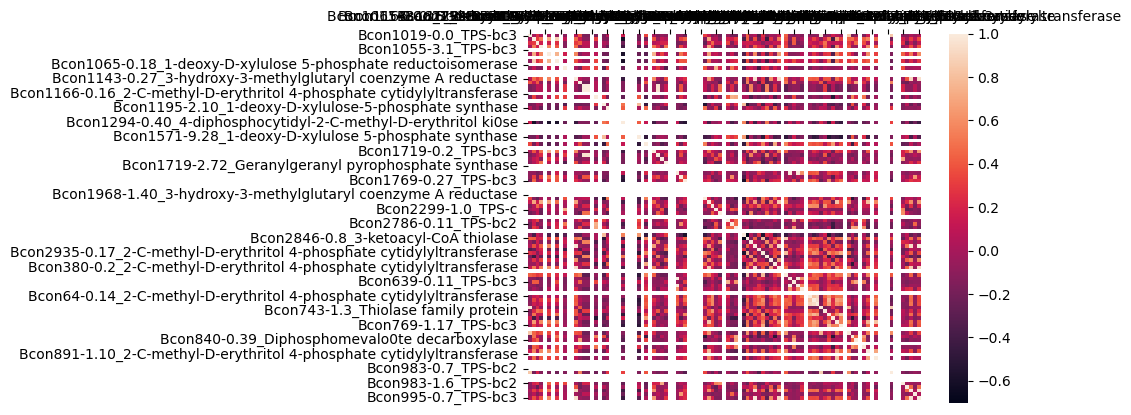

In [7]:
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

All these gaps are caused by genes which are not expressed.  Ifg we remove the 'all zero' rows we get a clearer plot

<AxesSubplot:>

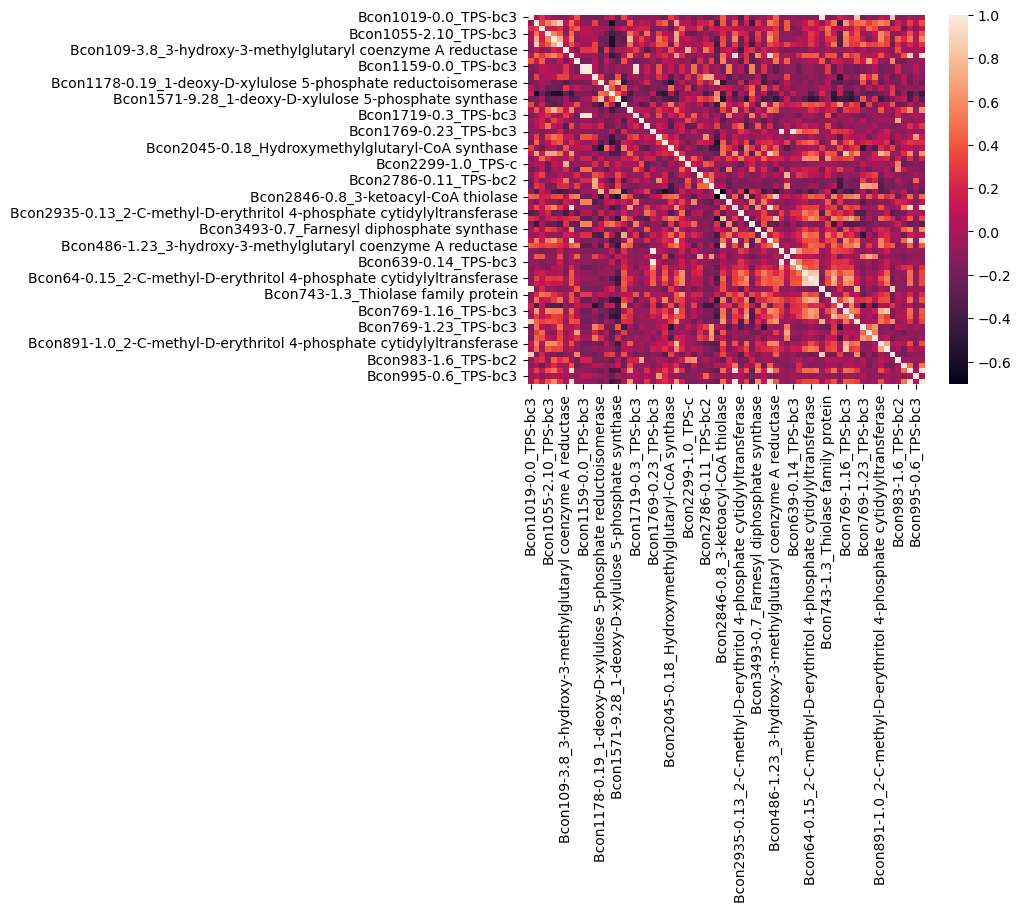

In [8]:
X = X.loc[:, (X != 0).any(axis=0)]
corrmat = X.corr()
sns.heatmap(corrmat, vmax=1., square=False)

But so messy!  

How can we order the heatmap plotting?  
For this we need to cluster the genes by the most similar.  


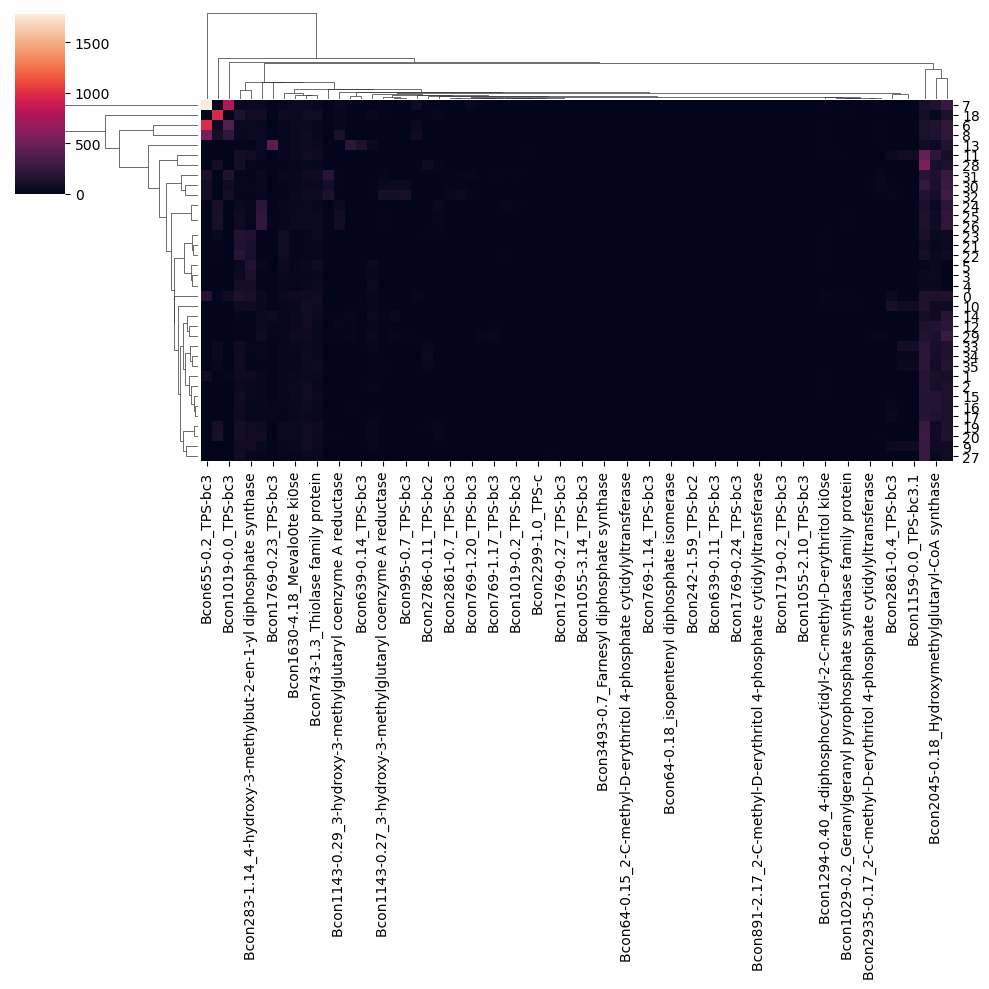

In [10]:
sns.clustermap(X)

Ah!  the plot is dominated by a few very highly expressed genes. One way round this is to change the ends of the color scale to the 2nd and 98th percentile values of the data, rather then the maximum and minimum.

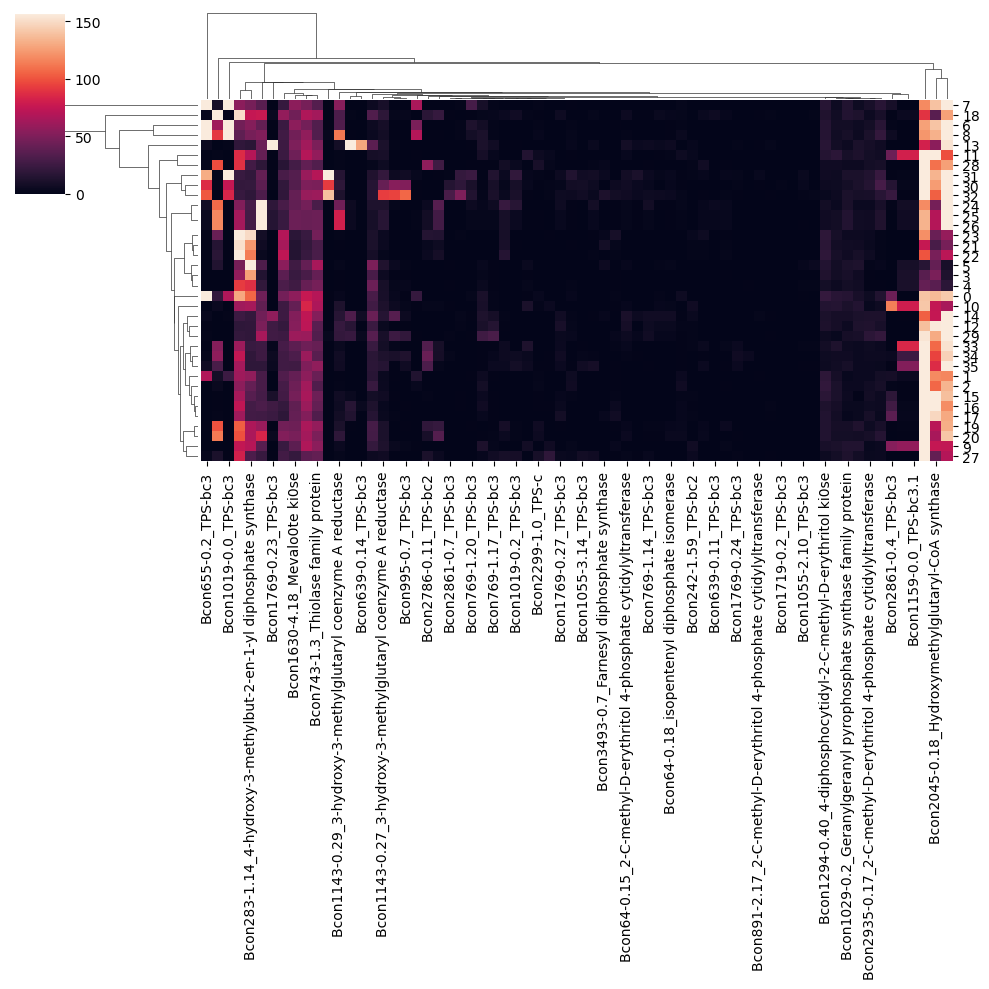

In [11]:
sns.clustermap(X, robust=True)

To see more pattern we need to standardise the dataframe.  We will use 'standard_scale =1' which , for each oclumn, subtracts the miniomum and divides by the maximum

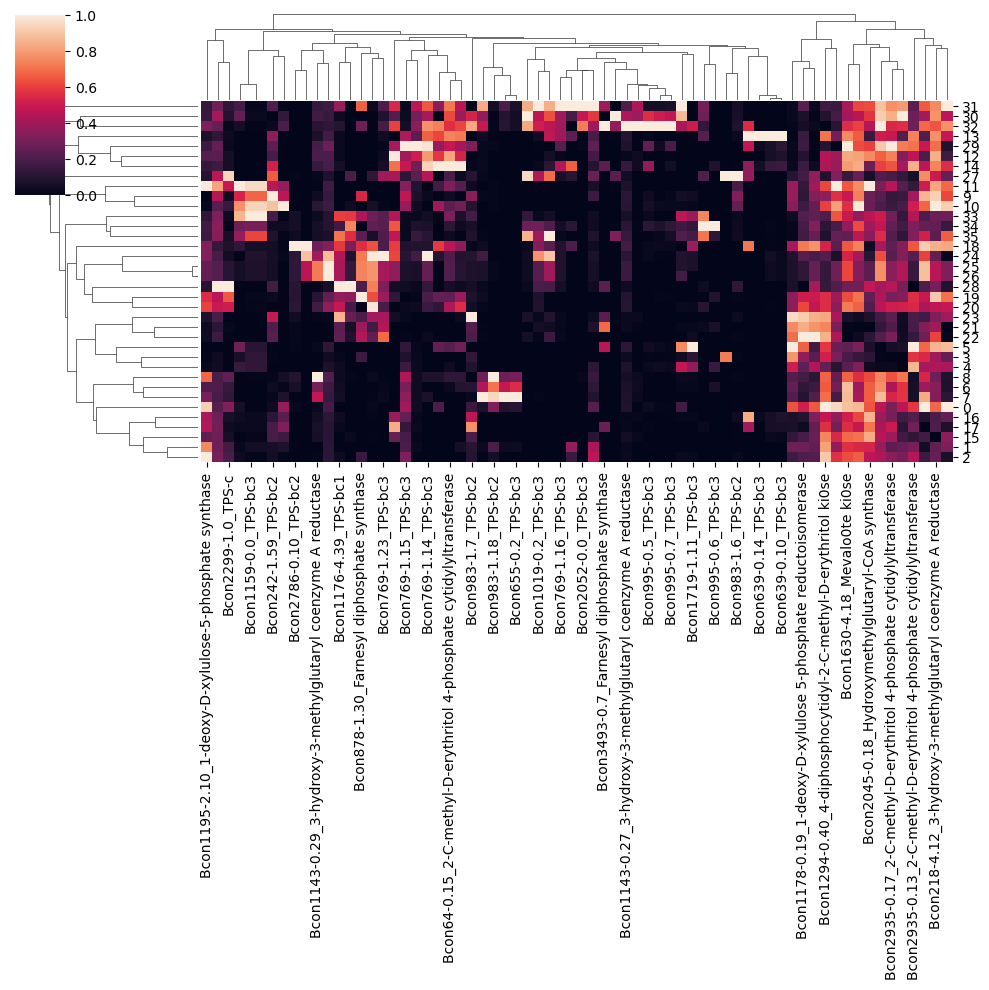

In [65]:
sns.clustermap(X, standard_scale = 1)

We can label the rows by tissue type

In [106]:
Y.head(3)

,Rep,Species,Tissue
0,1,conchifolia,Female.flower
1,2,conchifolia,Female.flower
2,3,conchifolia,Female.flower


In [143]:
Tissue = Y["Tissue"]
labels = Tissue.unique()
lut = dict(zip(set(labels), ['red','limegreen','deeppink','yellowgreen', 'saddlebrown', 'palegreen']))
row_colors = Tissue.map(lut)

In [144]:
Species = Y["Species"]
labels2 = Species.unique()
lut = dict(zip(set(labels2), ['orangered', 'lightgreen']))
row_colors2 = Species.map(lut)

In [132]:
Tissue.unique()

array(['Female.flower', 'Leaf', 'Male.flower', 'Petiole', 'Root',
       'Veg.bud'], dtype=object)

In [137]:
Species.unique()

array(['conchifolia', 'plebeja'], dtype=object)

In [147]:
row_colors2

0      orangered
1      orangered
2      orangered
3      orangered
4      orangered
         ...    
31    lightgreen
32    lightgreen
33    lightgreen
34    lightgreen
35    lightgreen
Name: Species, Length: 36, dtype: object

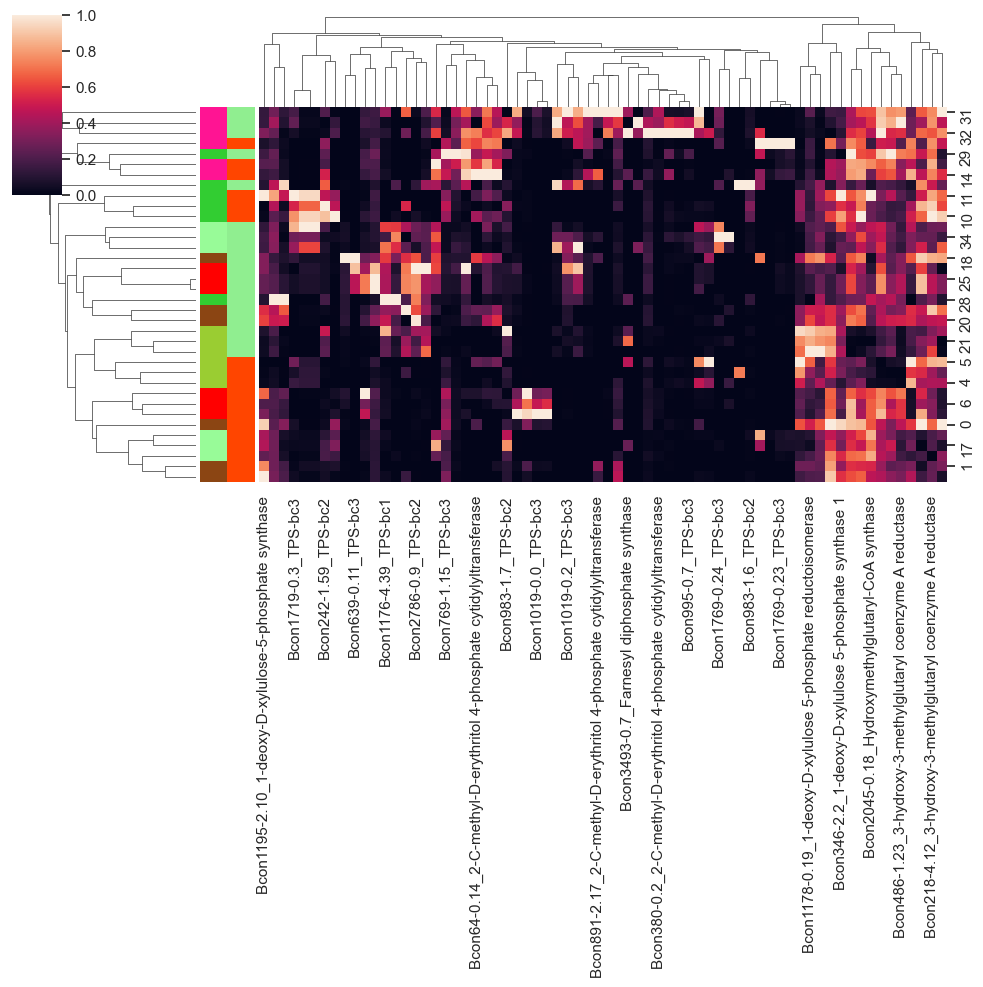

In [149]:
g=sns.clustermap(X, standard_scale = 1, row_colors=[row_colors, row_colors2])
plt.show()

The two species look very differnt.  Try plotting sperate heatmaps for each species.

Seaborn's clustermap using hierarchical clustering to group the data.  

Do we want an example of kmeans clustering here?  Is copmlex, but woudl be a good way to re-informce coding skills....